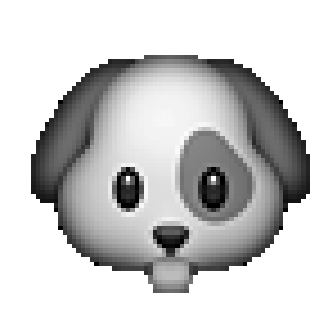

In [187]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import sin, cos, pi
from itertools import permutations

dog = plt.imread('/home/tongxueqing/zhaox/PythonSkills/ImageProcessing/dog.png')[:, :, :3]
dog = np.mean(dog, axis = 2, keepdims = False)
rotate = lambda a: np.array([[cos(a), sin(a), 0], [-sin(a), cos(a), 0], [0, 0, 1]])
height, width = dog.shape[:2]

def show(*plots):
    if len(plots) == 1:
        row, col = 1, 1
    elif len(plots) == 2:
        row, col = 1, 2
    elif len(plots) == 3:
        row, col = 2, 2
    else:
        row = int(len(plots) ** 0.5)
        if row * row >= len(plots):
            col = row
        else:
            col = row + 1
    fig, axs = plt.subplots(row, col)
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.1, wspace = 0.1)
    if isinstance(axs, matplotlib.axes._subplots.Axes):
        axs.imshow(plots[0], cmap = 'gray')
        axs.axis('off')
    else:
        for i, ax in enumerate(axs.flatten()):
            if i < len(plots):
                ax.imshow(plots[i], cmap = 'gray')
            ax.axis('off')
    plt.show()
show(dog)

In [176]:
def insertVal(xy, dog, mode = '4'):
    x, y = xy
    xi = int(x)
    yi = int(y)
    if mode == '4':
        if x % 1 == 0 and y % 1 == 0:
            return dog[xi, yi]
        elif x % 1 == 0:
            yi1 = yi + 1
            return (y - yi) * (dog[xi, yi1] - dog[xi, yi]) + dog[xi, yi]
        elif y % 1 == 0:
            xi1 = xi + 1
            return (x - xi) * (dog[xi1, yi] - dog[xi, yi]) + dog[xi, yi]
        else:
            A = np.array([[i, j, i * j, 1] for i in (xi, xi + 1) for j in (yi, yi + 1) if i < len(dog) and j < len(dog[0])])
            b = np.array([dog[i, j] for i, j in A[:, :2].tolist()])
            X = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), b)
            return np.dot([x, y, x * y, 1], X)
    if mode == '1':
        if x % 1 == 0 and y % 1 == 0:
            return dog[xi, yi]
        elif x % 1 == 0:
            return dog[xi, yi] if y - yi < 0.5 else dog[xi, yi + 1]
        elif y % 1 == 0:
            return dog[xi, yi] if x - xi < 0.5 else dog[xi + 1, yi]
        else:
            xi = xi if x - xi < 0.5 else xi + 1
            yi = yi if y - yi < 0.5 else yi + 1
            return dog[xi, yi]
        
def rot(dog, angle, mode = '4'):
    height, width = dog.shape[:2]
    mapping = np.array([[np.dot(rotate(angle).T, np.reshape([v, w, 1], 3, 1))[:2] for w in range(width)] for v in range(height)])
    mapping[:, :, 0] = (height - 1) * (mapping[:, :, 0] - np.min(mapping[:, :, 0])) / np.ptp(mapping[:, :, 0])
    mapping[:, :, 1] = (width - 1) * (mapping[:, :, 1] - np.min(mapping[:, :, 1])) / np.ptp(mapping[:, :, 1])
    out = np.apply_along_axis(insertVal, 2, mapping, dog, mode)
    return out

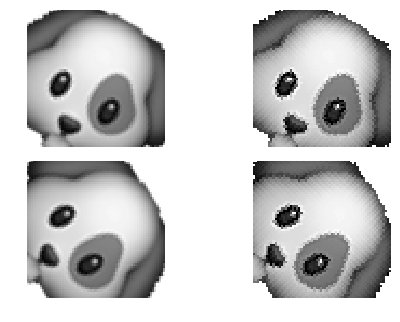

In [177]:
p1 = rot(dog, pi / 6)
p2 = rot(dog, pi / 6, mode = '1')
p3 = rot(dog, pi / 3)
p4 = rot(dog, pi / 3, mode = '1')

show(p1, p2, p3, p4)

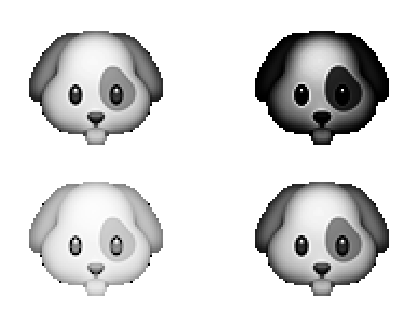

In [189]:
logdog = np.log2(dog + 1)
sqdog = dog ** 3        # 伽马变换
sqrdog = dog ** (1 / 3) # 伽马变换 
show(logdog, sqdog, sqrdog, dog)

In [ ]:
dog256 = 255 * dog
